In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# TODO: 

How to handle nan values....

In [2]:
# load and prep data
with open('./data/training set.pkl', 'rb') as fp:
    
    train_data = pickle.load(fp)
 
train_data.reset_index(drop = True, inplace = True)
train_data.dropna(inplace = True)

y =  train_data['lnpercapitaconsumption']
X = train_data.drop(columns = ['lnpercapitaconsumption'])
# scale 


In [3]:
# split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [17]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [19]:
X_train_2 = poly.fit_transform(X_train)

In [31]:
X_train_2.shape

(18139, 2629)

# Lasso
just testing some grid search and stuff
later probably use elstic net for luls

In [20]:
lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
clf.fit(X_train_2, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04,...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
clf.best_estimator_

Lasso(alpha=0.0003039195382313198, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

(0.63, 0.67)

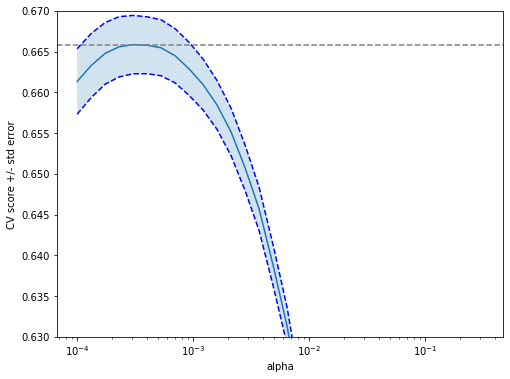

In [24]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
#plt.xlim([alphas[0], alphas[-1]])
plt.ylim([0.63,0.67])

In [26]:
# fit model with best alpha
model = Lasso(alpha = clf.best_estimator_.alpha, random_state = 42 ,max_iter = 10000)
model.fit(X_train_2,y_train)

Lasso(alpha=0.0003039195382313198, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
# save the interactionterm model
#with open('./data/interactionmodel.pkl', 'wb') as writer:
#    pickle.dump(model, writer)

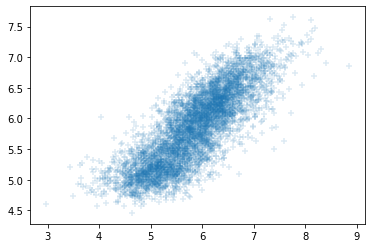

In [40]:
plt.scatter(y_test, y_pred, alpha = 0.15, marker = '+')

In [12]:
y_pred = model.predict(X_test)

In [14]:
mean_squared_error(y_train, model.predict(X_train))

0.19215184501203877

In [13]:
# without poly expansion
mean_squared_error(y_test, y_pred)

0.1899558980384507

In [30]:
# train with poly
mean_squared_error(y_train, model.predict(X_train_2))

0.17472328937753773

In [29]:
# with poly expansion
mean_squared_error(y_test, model.predict(poly.fit_transform(X_test)))

0.1823184238233237